<a href="https://colab.research.google.com/github/Shrez7961/Linear-Regression-Project/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Capstone Projects/Bike sharing Demand Prediction /Copy of SeoulBikeData.csv',encoding = 'unicode_escape')

### Data Inspection

In [6]:
# First look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [10]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [12]:
from datetime import datetime
import datetime as dt

In [13]:
# splitting "Date" column into three other columns like "year","month","day".
dataset['Date'] = dataset['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [14]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

### Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

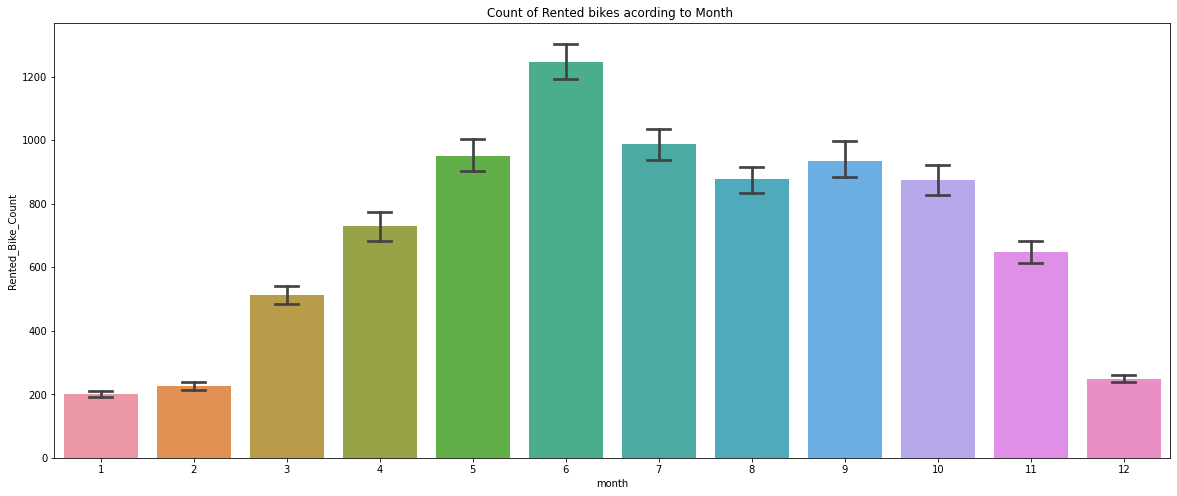

In [15]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

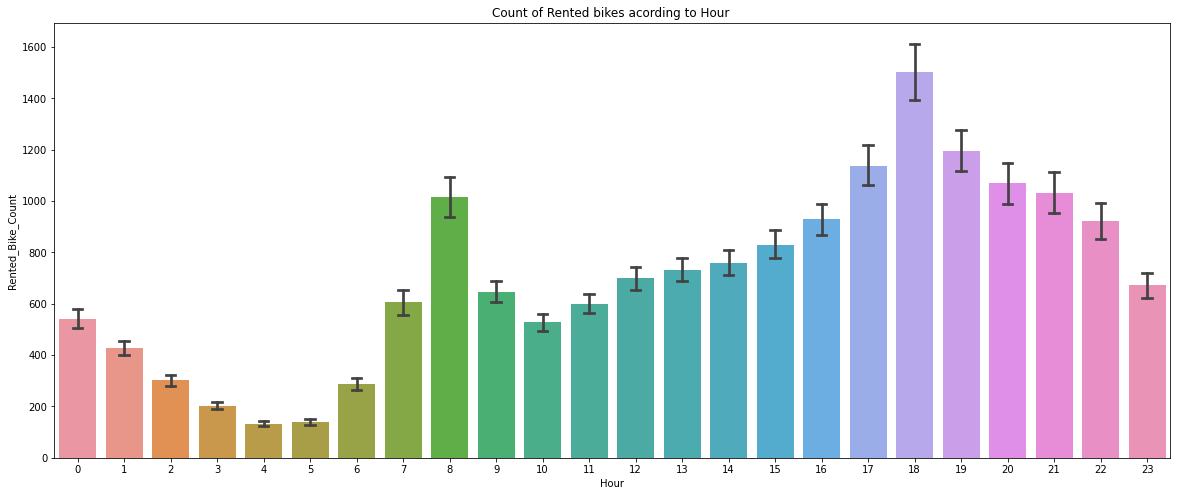

In [16]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

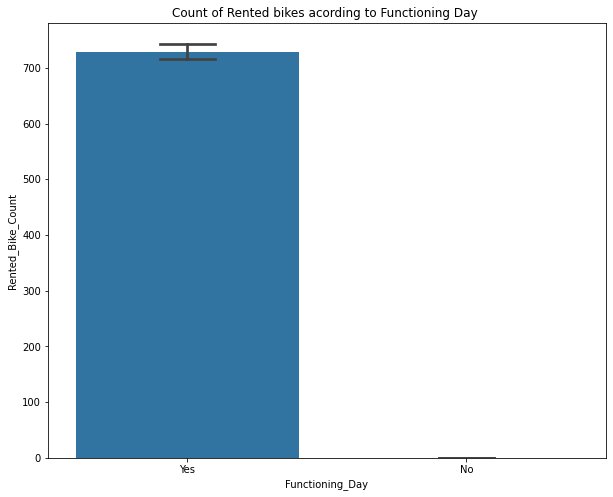

In [17]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

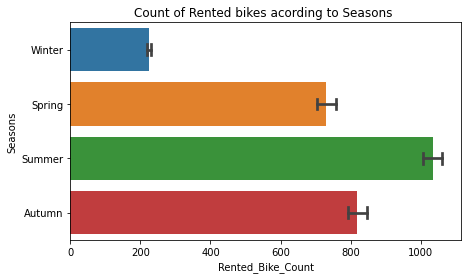

In [18]:
fig,ax=plt.subplots(figsize=(7,4))
sns.barplot(data=dataset,x='Rented_Bike_Count',y='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

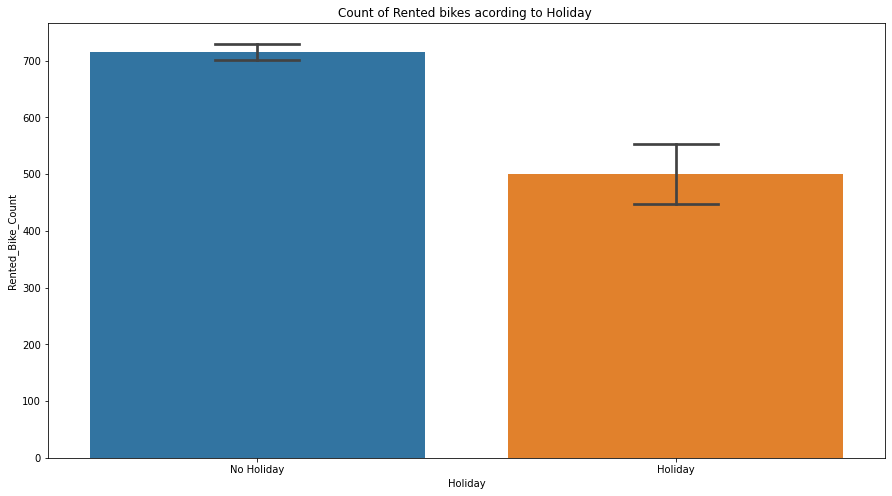

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [20]:
numerical_columns=list(dataset.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month'],
      dtype='object')

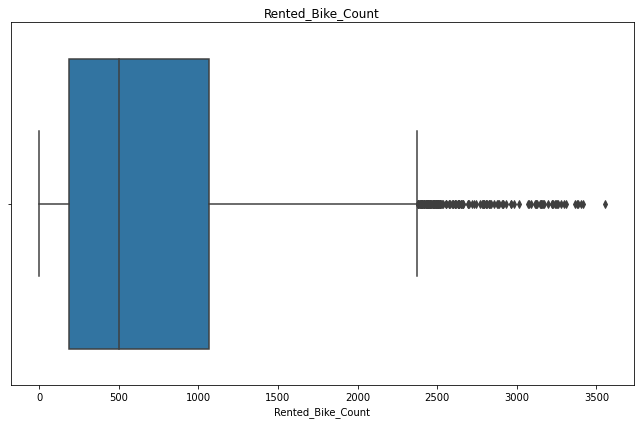

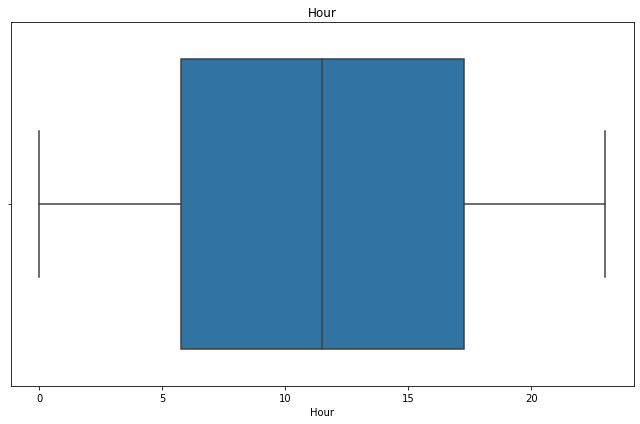

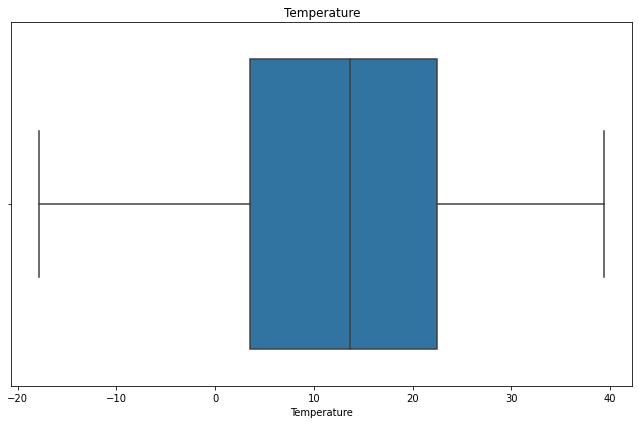

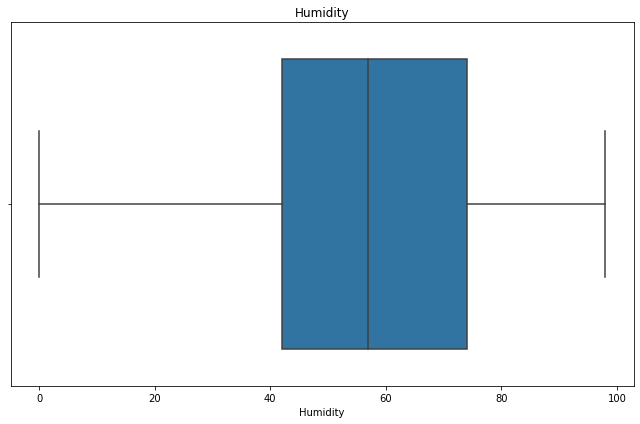

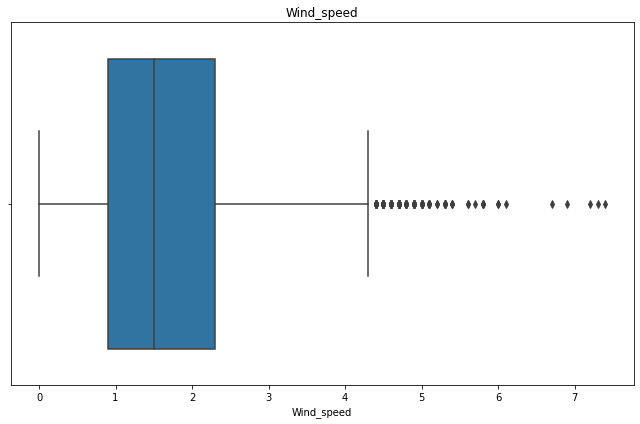

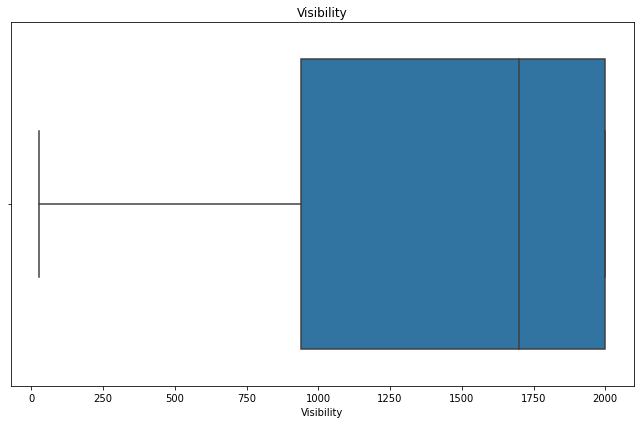

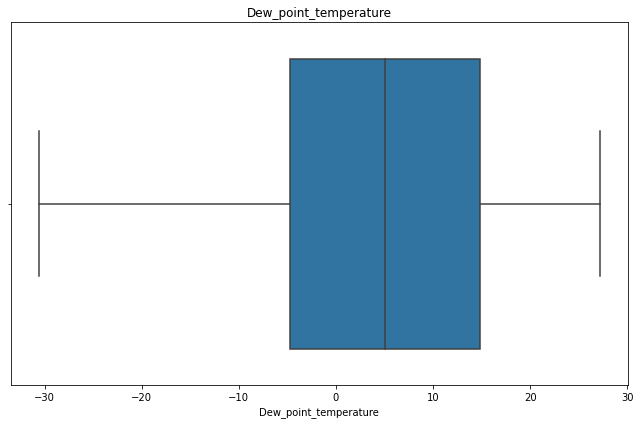

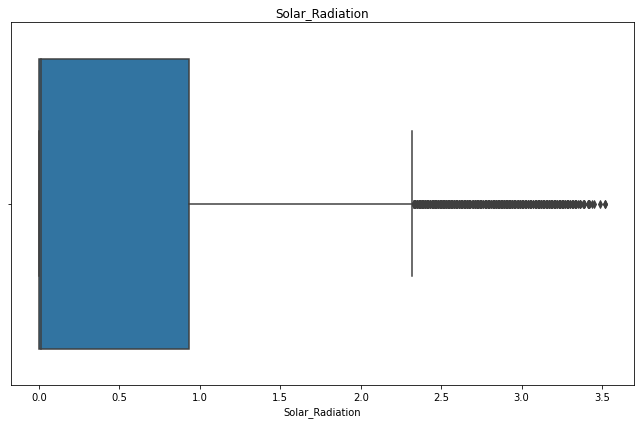

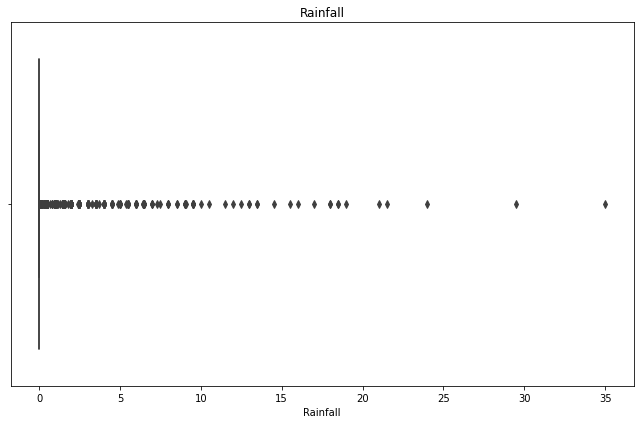

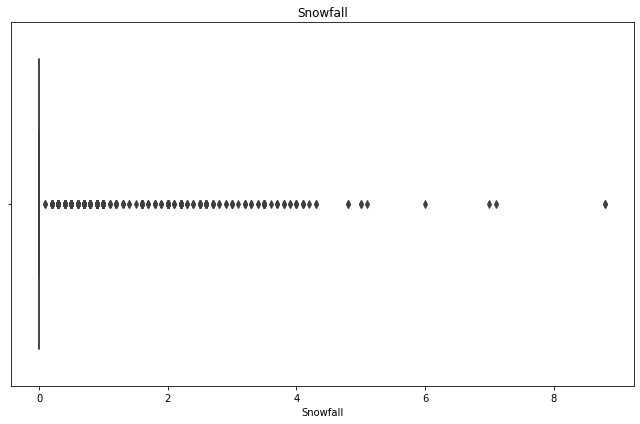

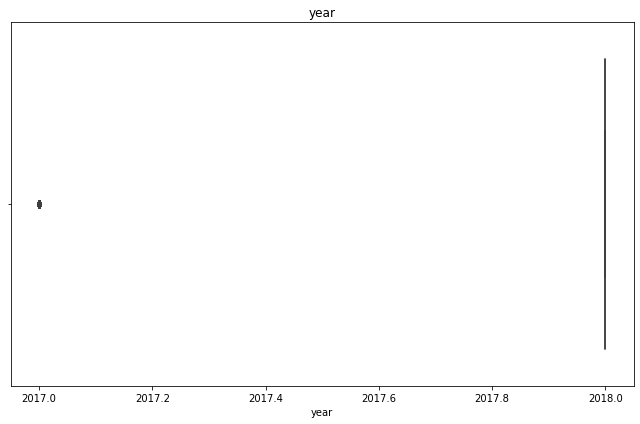

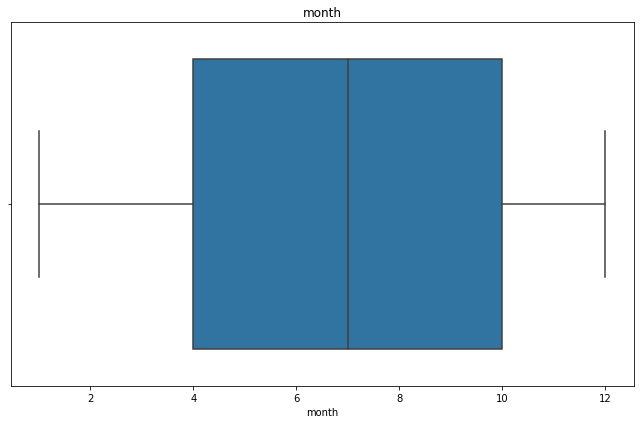

In [21]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

In [22]:
dataset.loc[dataset['Rainfall']>=4,'Rainfall']= 4
dataset.loc[dataset['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5 
dataset.loc[dataset['Snowfall']>2,'Snowfall']= 2
dataset.loc[dataset['Wind_speed']>=4,'Wind_speed']= 4

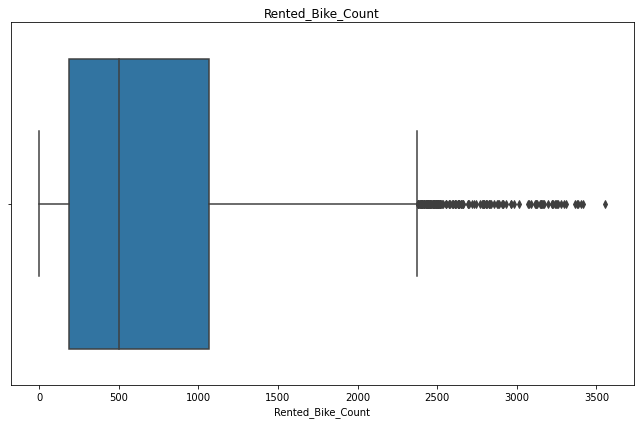

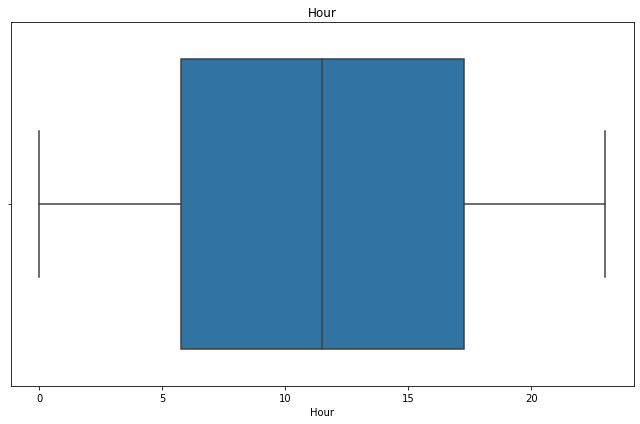

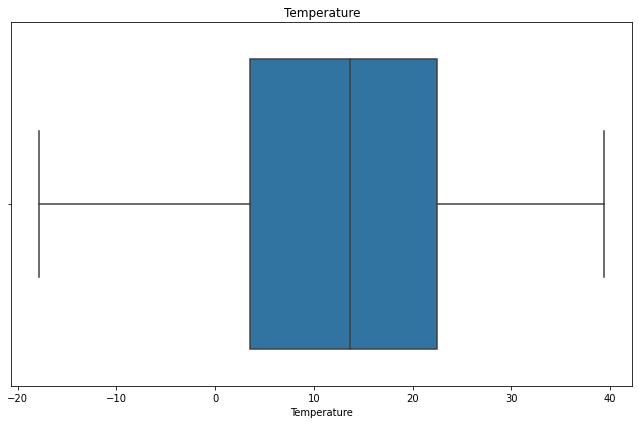

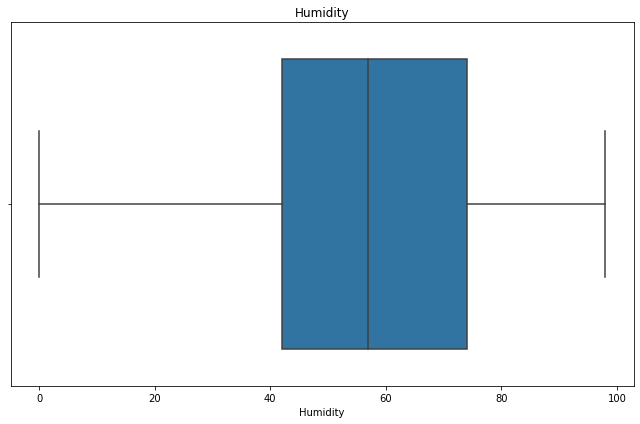

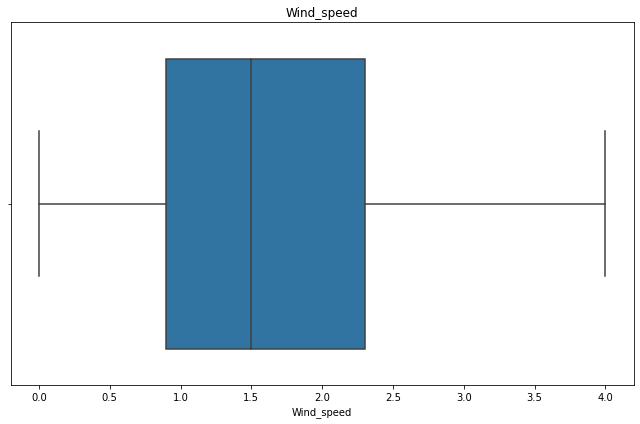

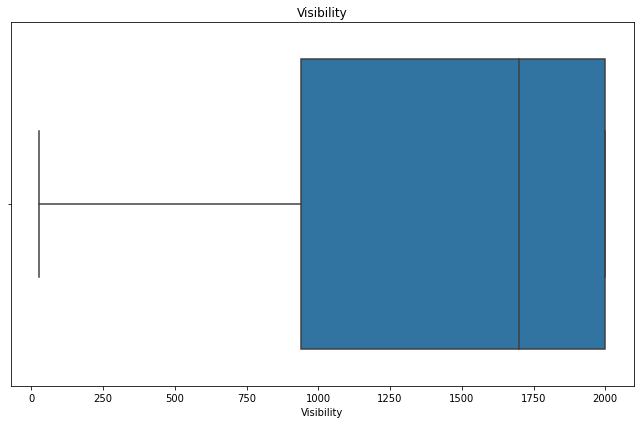

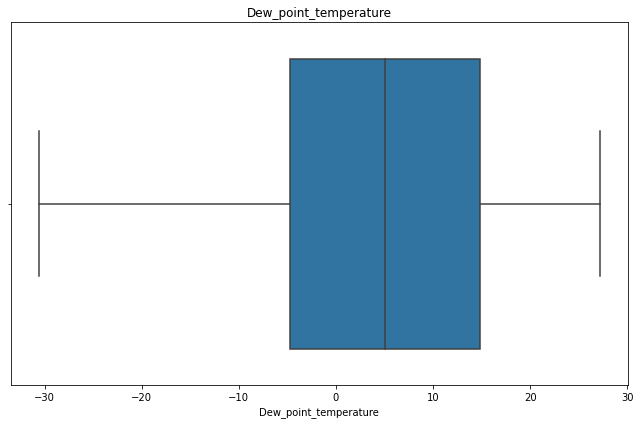

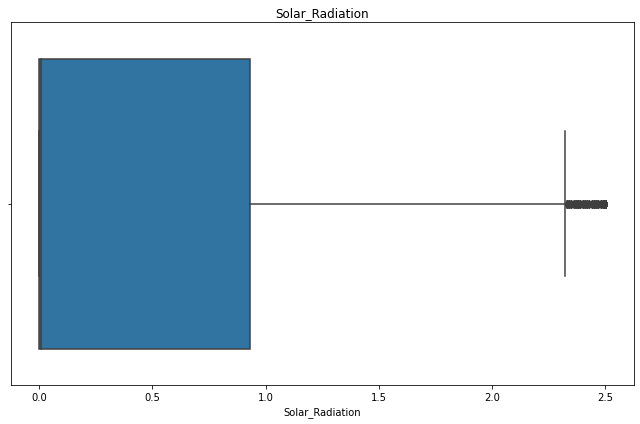

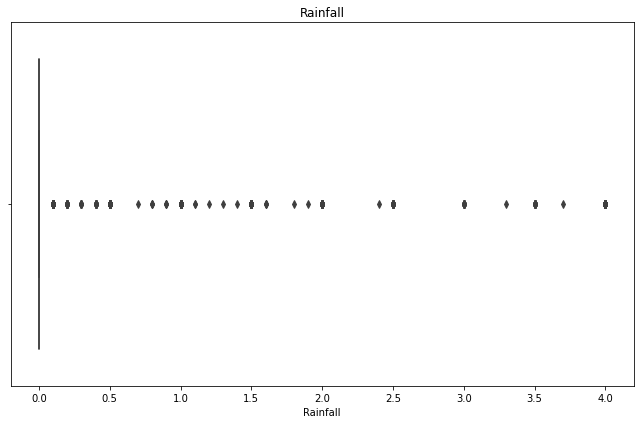

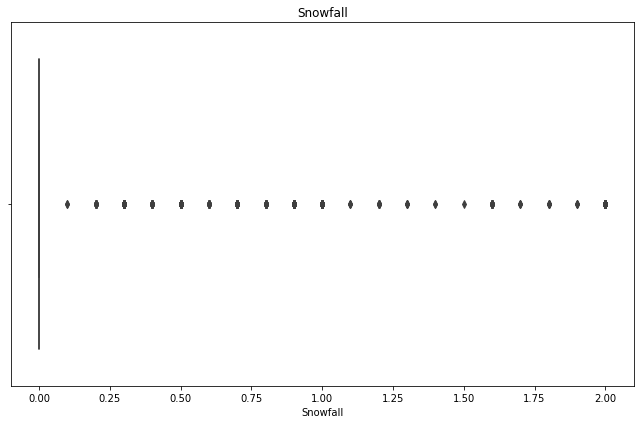

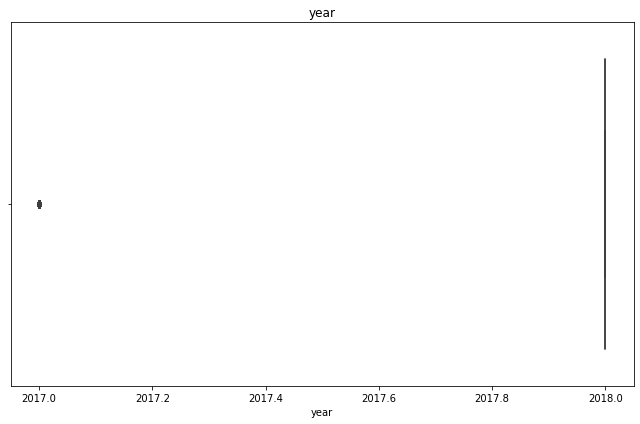

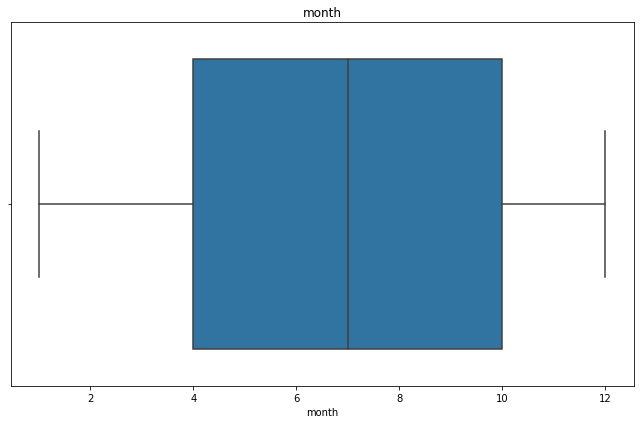

In [23]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

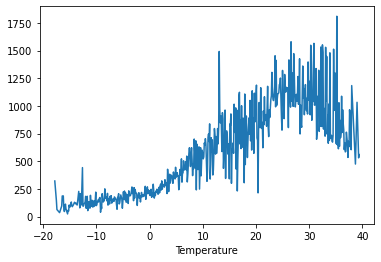

In [24]:
dataset.groupby('Temperature').median()['Rented_Bike_Count'].plot()

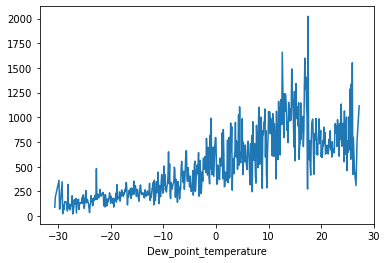

In [25]:
dataset.groupby('Dew_point_temperature').median()['Rented_Bike_Count'].plot()

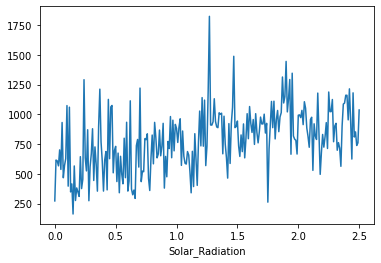

In [26]:
dataset.groupby('Solar_Radiation').median()['Rented_Bike_Count'].plot()

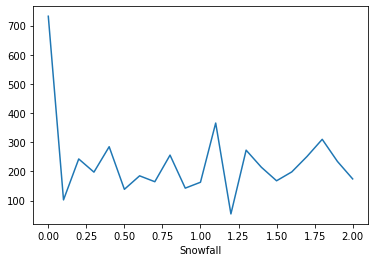

In [27]:
dataset.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

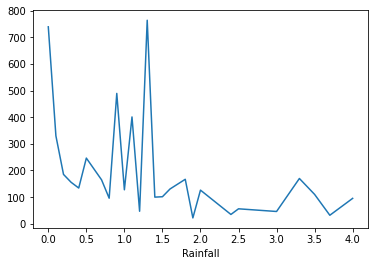

In [28]:
dataset.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

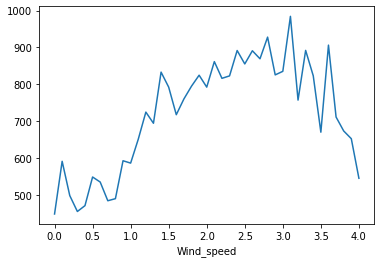

In [29]:
dataset.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

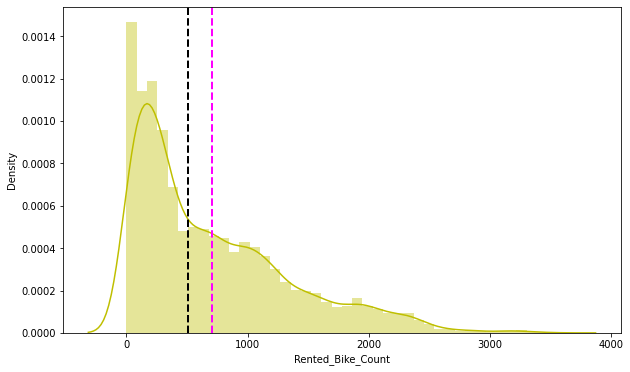

In [30]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(dataset['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(dataset['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(dataset['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

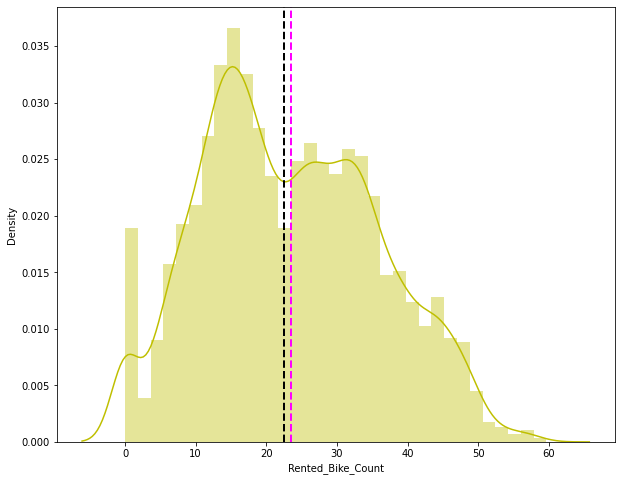

In [31]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(dataset['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

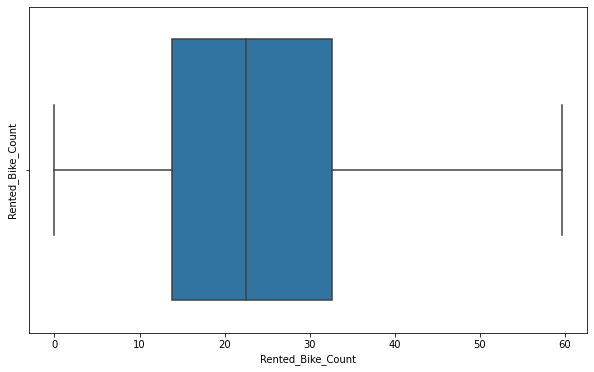

In [32]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(dataset['Rented_Bike_Count']))
plt.show()

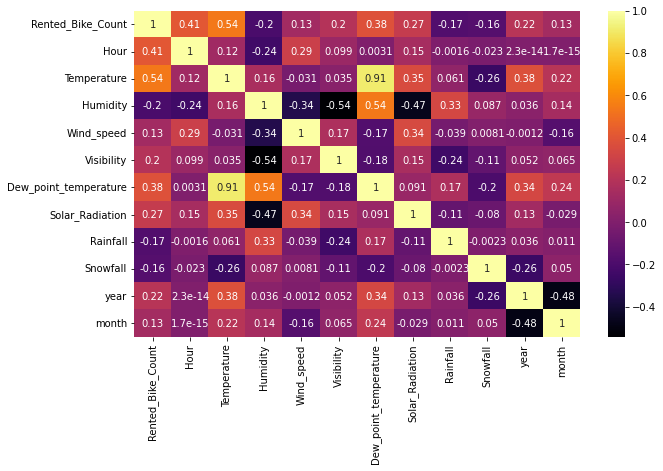

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [34]:
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

In [35]:
dataset=dataset.drop(['Snowfall'],axis=1)
dataset=dataset.drop(['Visibility'],axis=1)

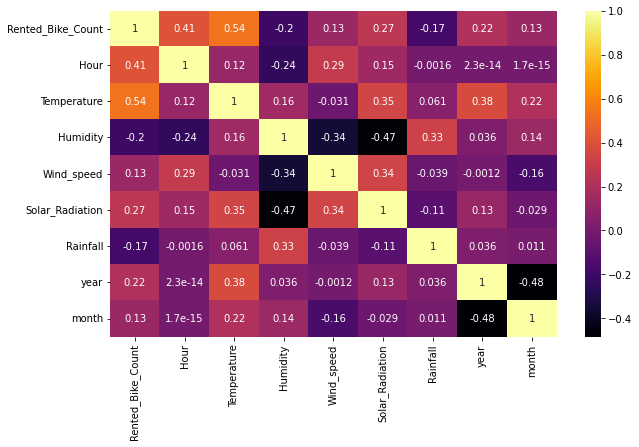

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [37]:
import statsmodels.api as sm
X = dataset[[ 'Temperature','Humidity',
       'Wind_speed',
       'Solar_Radiation', 'Rainfall']]
Y = dataset['Rented_Bike_Count']
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [38]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
0,1.0,-5.2,37,2.2,0.0,0.0
1,1.0,-5.5,38,0.8,0.0,0.0
2,1.0,-6.0,39,1.0,0.0,0.0
3,1.0,-6.2,40,0.9,0.0,0.0
4,1.0,-6.0,36,2.3,0.0,0.0
...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,0.0,0.0
8756,1.0,3.4,37,2.3,0.0,0.0
8757,1.0,2.6,39,0.3,0.0,0.0
8758,1.0,2.1,41,1.0,0.0,0.0


In [39]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1187.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        04:46:43   Log-Likelihood:                -66832.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8754   BIC:                         1.337e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             772.7524     24.771     31.196      0.000     724.195     821.310
Temperature        34.9916      0.519     67.391      0.000      33.974      36.009
Humidity           -9.3922      0.343    -27.401      0.000     -10.064      -8.720
Wind_speed         62.8582      5.939     10.584      0.000      51.217      74.500
Solar_Radiation  -116.4219      8.751    -13.304      0.000    -133.576     -99.268
Rainfall         -160.2743     11.052    -14.502      0.000    -181.939    -138.610
==============================================================================
Omnibus:                      955.374   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1595.330
Skew:                           0.766   Prob(JB):                         0.00
Kurtosis:                       4.423   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
const,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.350679,0.061274
Humidity,NaN,0.159371,1.000000,-0.341432,-0.467236,0.331631
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.342995,-0.038813
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,1.000000,-0.105920
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.105920,1.000000


In [41]:
dataset['day']=dataset.apply((lambda x : 0 if x['day']=='Sunday' or x['day']=='Saturday' else 1),axis=1)

In [42]:
dataset=pd.get_dummies(dataset, columns=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'], prefix=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'])

In [43]:
dataset=dataset.drop(['year'],axis=1)

In [44]:
dataset=dataset.drop(['Date'],axis=1)

In [45]:
dataset

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,day,Hour_0,Hour_1,Hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,9.983338
1,Humidity,2.005530
2,Wind_speed,1.438747
3,Solar_Radiation,4.960836
4,Rainfall,1.196389
5,day,1.008332
6,Hour_0,inf
7,Hour_1,inf
8,Hour_2,inf
9,Hour_3,inf


In [49]:
X = dataset.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset['Rented_Bike_Count'])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [51]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [52]:
reg.score(X_train, y_train)

0.7932751499126951

In [53]:
reg.coef_

array([ 4.48388022e-01, -1.19475444e-01, -7.52103057e-03,  8.56367785e-01,
       -5.20062829e+00,  1.45606925e+00,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  5.34238163e+10,  5.34238163e+10,
        5.34238163e+10,  5.34238163e+10,  3.90146580e+10,  6.24220366e+11,
        1.34424113e+12,  2.04234347e+11,  1.36663578e+11,  1.36663578e+11,
        1.14144054e+11,  1.14144054e+11,  3.94550791e+11,  3.94550791e+11,
       -2.54352280e+10, -2.54352280e+10, -2.54352280e+10, -7.45455996e+11,
       -7.45455996e+11, -7.45455996e+11,  5.59770480e+11,  5.59770480e+11,
        5.59770480e+11,  3.94550791e+11])

In [54]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [58]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

r2_test= r2_score(y_test, y_pred_test)
print(f'R2 for Test Data: {r2_test}')

MSE : 32.09815332904518
RMSE : 5.665523217589456
MAE : 4.312666558238763
R2 : 0.7932751499126951
Adjusted R2 : 0.7871985817149495
R2 for Test Data: 0.7957394972701987


In [59]:
pd.DataFrame(y_pred_test,y_test)

,0
Rented_Bike_Count,
26.343880,34.601685
34.438351,32.990234
28.089144,25.768433
22.605309,28.844971
13.784049,10.392334
...,...
9.219544,17.605469
34.583233,33.440918
27.838822,29.394165


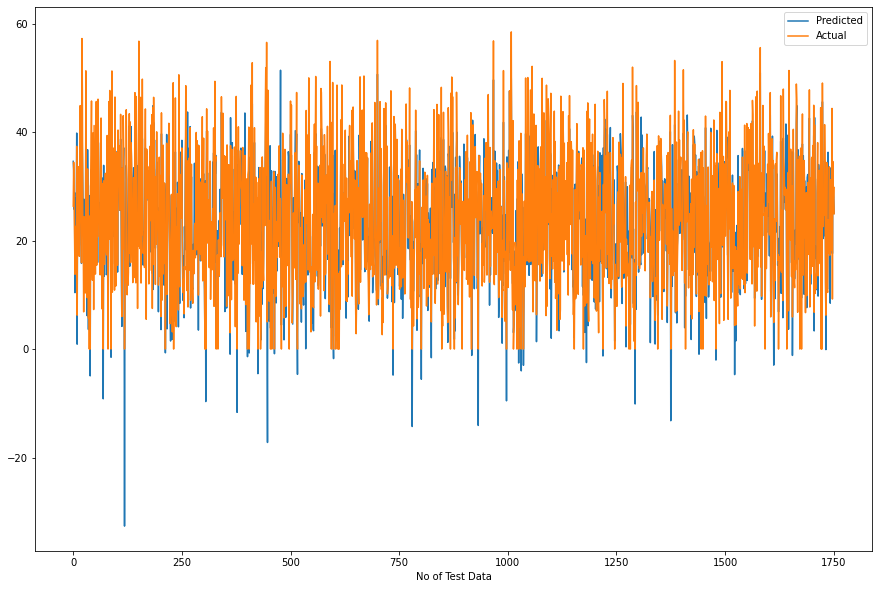

In [62]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [63]:
pd.DataFrame(y_pred_test,y_test)

,0
Rented_Bike_Count,
26.343880,34.601685
34.438351,32.990234
28.089144,25.768433
22.605309,28.844971
13.784049,10.392334
...,...
9.219544,17.605469
34.583233,33.440918
27.838822,29.394165


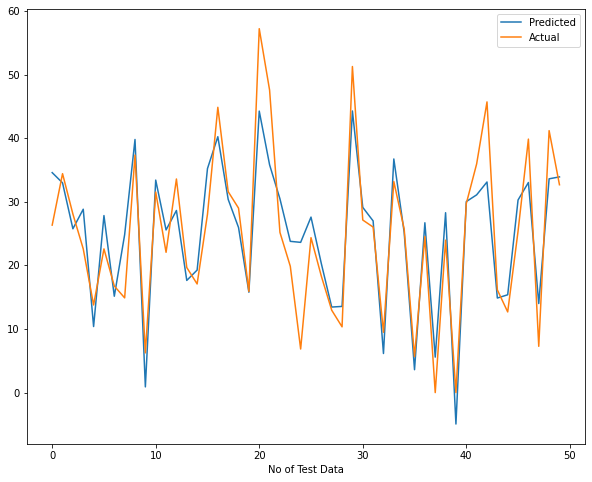

In [64]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [65]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7950445604214597 0.7925678461654525


In [66]:
lasso.coef_

array([ 4.54758934e-01, -1.24171421e-01,  2.27915187e-02,  3.79598574e-01,
       -5.18517189e+00,  1.39205861e+00,  0.00000000e+00, -1.78724884e+00,
       -4.40541990e+00, -6.89599678e+00, -9.15383289e+00, -8.75519537e+00,
       -3.74775025e+00,  1.69196143e+00,  7.72376556e+00,  1.77037842e+00,
       -2.25212401e+00, -1.93425167e+00, -1.08711756e+00, -1.30235184e+00,
       -1.36953035e+00, -0.00000000e+00,  7.87991662e-01,  4.60179196e+00,
        1.04504429e+01,  7.23100195e+00,  5.97804031e+00,  6.37651723e+00,
        5.04277013e+00,  1.70654050e+00,  2.94302129e+00,  3.79987188e-01,
       -2.94367230e-03, -3.27631264e+00, -3.01675495e+00,  0.00000000e+00,
       -2.82531993e+01,  0.00000000e+00, -1.25422703e+00, -1.99183648e+00,
       -1.47562067e+00,  0.00000000e+00,  2.37166630e+00,  5.00564118e+00,
       -2.55745347e-01, -2.46548383e+00, -5.78774095e-02,  2.09881312e+00,
        2.09998882e-01,  5.50481503e-01])

In [67]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

r2_test = r2_score(y_test, y_pred_test_lasso)
print(f'R2 Score for lasso regression on test data: {r2_test}')

MSE : 32.20797633348617
RMSE : 5.675207162164758
MAE : 4.324063499812541
R2 : 0.7925678461654525
Adjusted R2 : 0.7864704871462125
R2 Score for lasso regression on test data: 0.7950445604214597


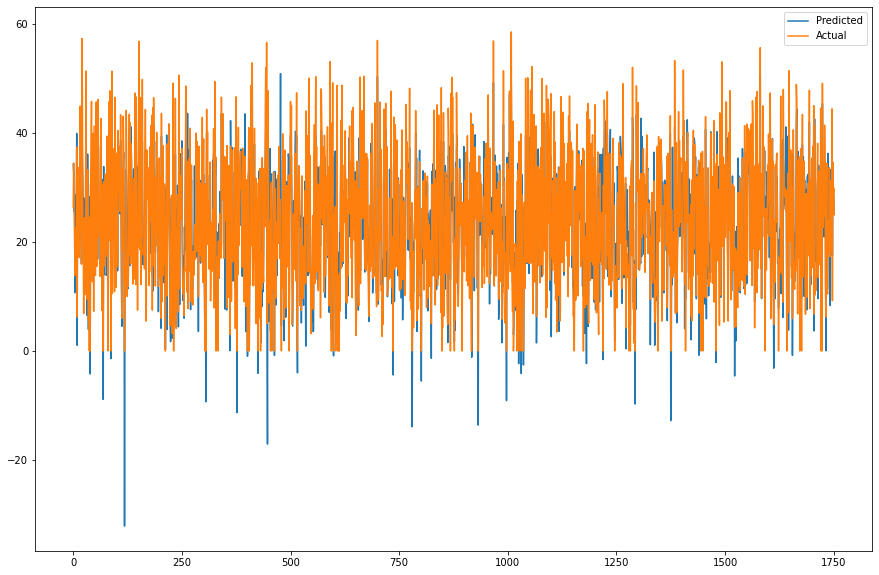

In [71]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [73]:
y_ct=y_test

In [74]:
pd.DataFrame(y_pred_test_lasso,y_test)

,0
Rented_Bike_Count,
26.343880,34.205585
34.438351,32.669306
28.089144,25.542981
22.605309,28.693787
13.784049,10.660258
...,...
9.219544,17.466916
34.583233,33.615315
27.838822,28.863634


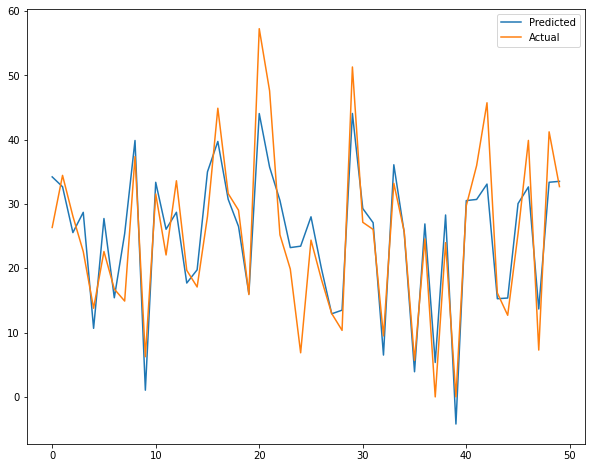

In [75]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso[0:50]))
plt.plot(np.array((y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [76]:
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.01)

In [77]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [79]:
#check the score for train data:
ridge.score(X_train, y_train)

0.7932751418953446

In [83]:
# check the score for test data
ridge.score(X_test, y_test)

0.7957386534840998

In [80]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [82]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

r2_rtest= r2_score(y_test, y_pred_test_ridge)
print (f'The R2 score for test data is : {r2_rtest}')

MSE : 32.09815457389865
RMSE : 5.665523327451635
MAE : 4.312698799459886
R2 : 0.7932751418953446
Adjusted R2 : 0.7871985734619333
The R2 score for test data is : 0.7957386534840998


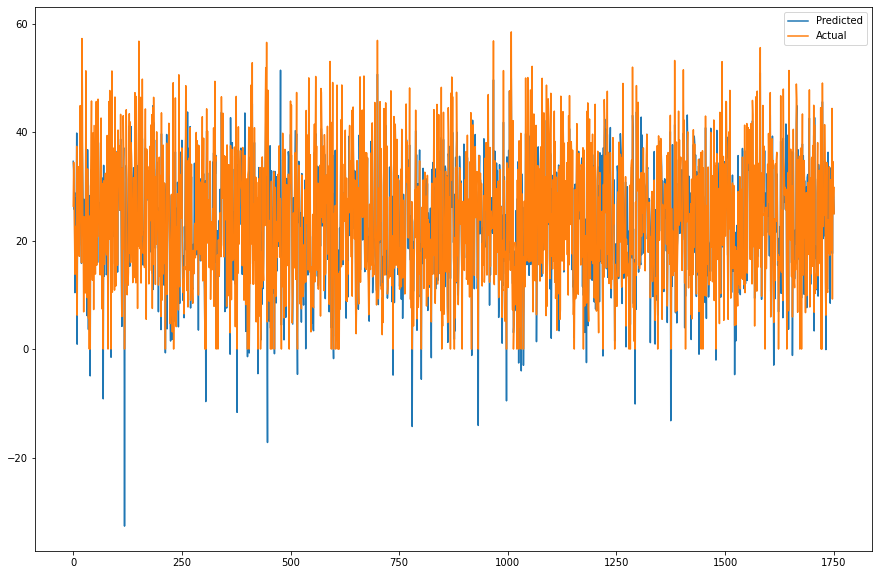

In [85]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [86]:
pd.DataFrame(y_pred_test_ridge,y_test)

,0
Rented_Bike_Count,
26.343880,34.601223
34.438351,32.990076
28.089144,25.767995
22.605309,28.844574
13.784049,10.391752
...,...
9.219544,17.604242
34.583233,33.441391
27.838822,29.393668


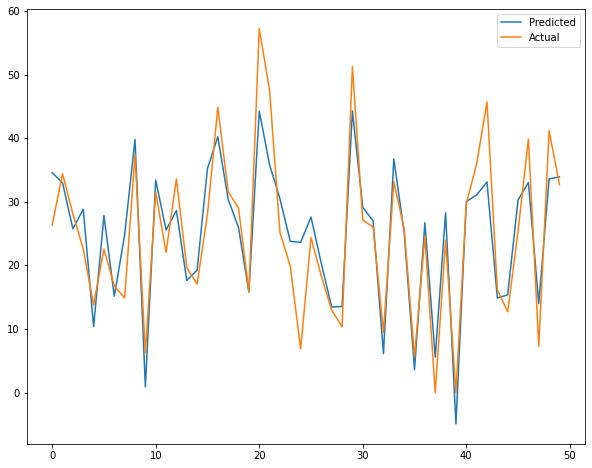

In [87]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [88]:
from xgboost import XGBRegressor

In [89]:
# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)

[05:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [90]:
y_pred_train_xgb=model.predict(X_train)
y_pred_test_xgb=model.predict(X_test)

In [91]:
pd.DataFrame(y_pred_test_xgb,y_test)

,0
Rented_Bike_Count,
26.343880,31.985821
34.438351,33.822247
28.089144,27.890425
22.605309,29.002432
13.784049,13.431493
...,...
9.219544,14.643251
34.583233,31.297544
27.838822,28.346752


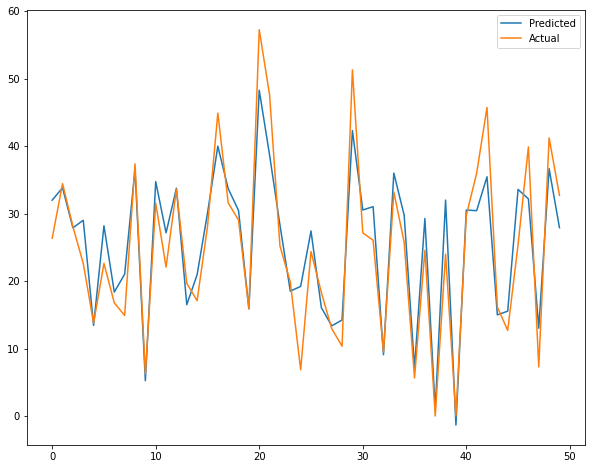

In [92]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_xgb[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [93]:
model.score(X_train, y_train)

0.8792511118058354

In [94]:
from sklearn.ensemble import AdaBoostRegressor

In [95]:
# define model
model_ada = AdaBoostRegressor()
# fit model
model_ada.fit(X_train, y_train)

AdaBoostRegressor()

In [96]:
y_pred_train_ada=model_ada.predict(X_train)
y_pred_test_ada=model_ada.predict(X_test)

In [97]:
pd.DataFrame(y_pred_test_ada,y_test)

,0
Rented_Bike_Count,
26.343880,32.263793
34.438351,32.626116
28.089144,25.417332
22.605309,28.252876
13.784049,17.245240
...,...
9.219544,15.997485
34.583233,33.928329
27.838822,27.532087


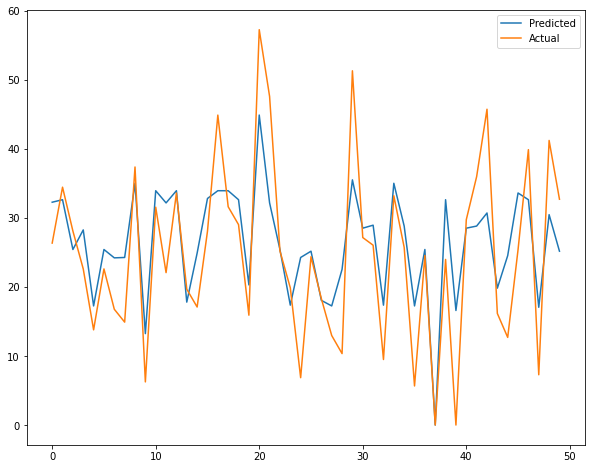

In [98]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ada[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [99]:
model_ada.score(X_train, y_train)

0.6267031150380267

In [101]:
model_ada.score(X_test, y_test)

0.6169688767089724

In [102]:
#GradientBoostingRegressor

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
# define model
model_grad = GradientBoostingRegressor()
# fit model
model_grad.fit(X_train, y_train)

GradientBoostingRegressor()

In [105]:
y_pred_train_grad=model_grad.predict(X_train)
y_pred_test_grad=model_grad.predict(X_test)

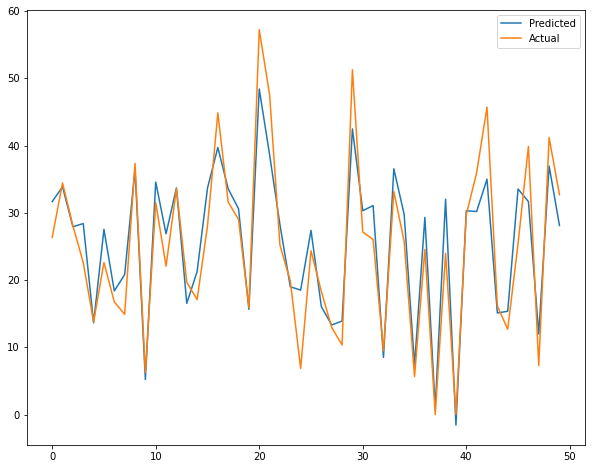

In [106]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_grad[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [107]:
model_grad.score(X_train, y_train)

0.8773928275306471

In [108]:
model_grad.score(X_test, y_test)

0.8631611167878286